In [2]:
import numpy as np
import pandas as pd

In [4]:
df=pd.read_csv("class-05-assignment.csv")

In [6]:
df

,Weight,Price
0,2,35
1,4,60
2,5,20
3,3,50
4,6,50
5,5,55
6,7,60


# need to calculate m and c now

In [9]:
df['Weight']

0    2
1    4
2    5
3    3
4    6
5    5
6    7
Name: Weight, dtype: int64

In [11]:
df['Price']

0    35
1    60
2    20
3    50
4    50
5    55
6    60
Name: Price, dtype: int64

In [13]:
x=df['Weight']
y=df['Price']

In [15]:
x

0    2
1    4
2    5
3    3
4    6
5    5
6    7
Name: Weight, dtype: int64

In [17]:
y

0    35
1    60
2    20
3    50
4    50
5    55
6    60
Name: Price, dtype: int64

In [19]:
mean_x=np.mean(x)
mean_y=np.mean(y)

In [21]:
mean_x

4.571428571428571

In [23]:
mean_y

47.142857142857146

In [25]:
dev_x=x-mean_x

In [27]:
dev_x

0   -2.571429
1   -0.571429
2    0.428571
3   -1.571429
4    1.428571
5    0.428571
6    2.428571
Name: Weight, dtype: float64

In [29]:
dev_y=y-mean_y

In [31]:
dev_y

0   -12.142857
1    12.857143
2   -27.142857
3     2.857143
4     2.857143
5     7.857143
6    12.857143
Name: Price, dtype: float64

In [33]:
## calculating m

a= np.sum(dev_x * dev_y)

In [35]:
a

46.42857142857143

In [37]:
b=np.sum(dev_x ** 2)

In [45]:
m=a/b
m

2.620967741935484

In [49]:
#calculation c

c= mean_y - m*(mean_x)
c

35.16129032258065

In [51]:
from sklearn.linear_model import LinearRegression

In [53]:
reg= LinearRegression()

In [55]:
reg.fit(df[['Weight']], df[['Price']])

LinearRegression()

# *Task-01*

# **Prediction for 6.5**

In [63]:
reg.predict([[6.5]])

E:\anac\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[52.19758065]])

In [65]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Price-Prediction')

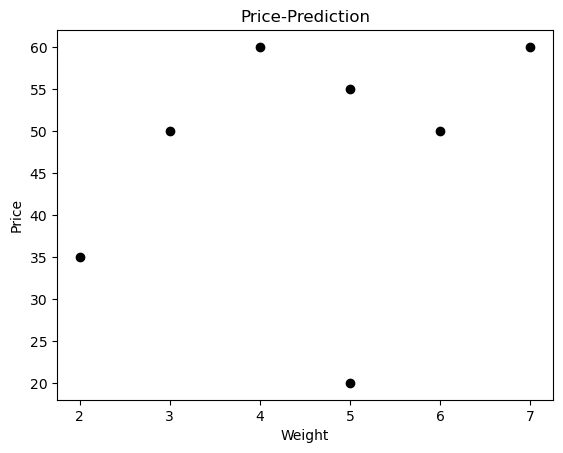

In [67]:
plt.scatter(x, y, color='black', marker='o')
plt.xlabel('Weight')
plt.ylabel('Price')
plt.title('Price-Prediction')

In [69]:
df2=df.copy()

In [71]:
df2

,Weight,Price
0,2,35
1,4,60
2,5,20
3,3,50
4,6,50
5,5,55
6,7,60


In [73]:
df2["Predicted Price"]=reg.predict(df[["Weight"]])

In [75]:
df2

,Weight,Price,Predicted Price
0,2,35,40.403226
1,4,60,45.645161
2,5,20,48.266129
3,3,50,43.024194
4,6,50,50.887097
5,5,55,48.266129
6,7,60,53.508065


In [108]:
y1=df2["Predicted Price"]

# *Task-02*

# **Calculating Residuals**

In [82]:
df2['residual']=df2["Price"]-df2["Predicted Price"]

In [84]:
df2

,Weight,Price,Predicted Price,residual
0,2,35,40.403226,-5.403226
1,4,60,45.645161,14.354839
2,5,20,48.266129,-28.266129
3,3,50,43.024194,6.975806
4,6,50,50.887097,-0.887097
5,5,55,48.266129,6.733871
6,7,60,53.508065,6.491935


# *Task-03*

# **Calculating MSE & MAE**

In [96]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [100]:
mse=mean_squared_error(df2[["Predicted Price"]], df2[["Price"]])

In [102]:
mse

167.30990783410135

In [104]:
mae=mean_absolute_error(df2[["Predicted Price"]], df2[["Price"]])

In [106]:
mae

9.87327188940092

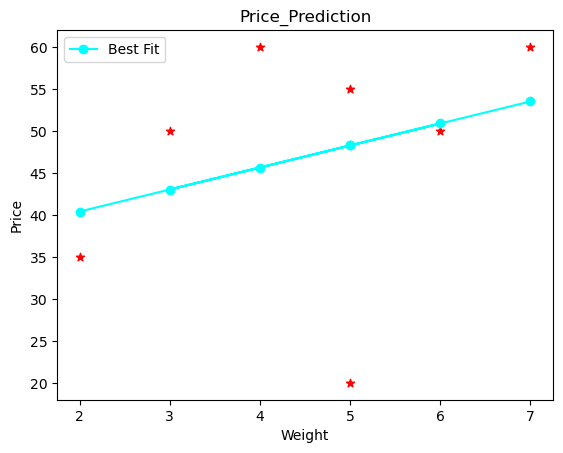

In [146]:
plt.scatter(x, y, color='red', marker='*')
plt.plot(x, y1,label='Best Fit', color='cyan', marker='o')
plt.xlabel('Weight')
plt.ylabel('Price')
plt.title('Price_Prediction')
plt.legend()
plt.show()

# *Task-04*

#  **Generating an Excel file**

In [154]:
new = {
    'Weight': [2, 4, 5, 3, 6, 5, 7],
    'Price': [35, 60, 20, 50, 50, 55, 60]
}

In [158]:
df3 = pd.DataFrame(new)

In [160]:
df3

,Weight,Price
0,2,35
1,4,60
2,5,20
3,3,50
4,6,50
5,5,55
6,7,60


In [162]:
df.to_excel('weight_price.xlsx')